## 1) Importing Necessary Libraries
First off, we need to import several Python libraries such as numpy, pandas, matplotlib and seaborn.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

## 2) Reading in and Exploring the Data 
It's time to read in our training and testing data using `pd.read_csv`, and take a first look at the training data using the `describe()` function.

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Gilnagh, Miss. Katherine ""Katie""",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 3) Data Analysis
We're going to consider the features in the dataset and how complete they are. 

In [3]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Gilnagh, Miss. Katherine ""Katie""",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


****EDA****

### Sex Feature

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


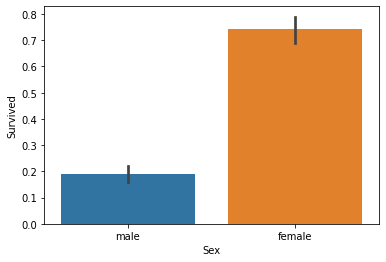

In [6]:
sns.barplot(x="Sex", y="Survived", data=train)

print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Females had higher chance of survival than males. The Sex feature is essential in our predictions.

### Pclass Feature

In [7]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


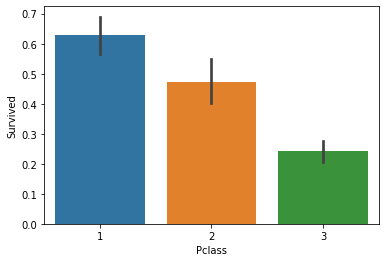

In [8]:
sns.barplot(x="Pclass", y="Survived", data=train)

print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

### SibSp Feature

In [9]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


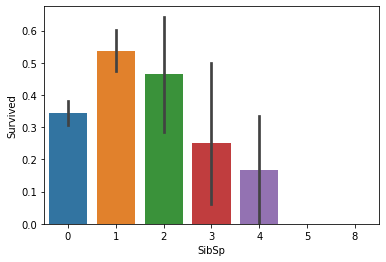

In [10]:
sns.barplot(x="SibSp", y="Survived", data=train)

print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

### Parch Feature

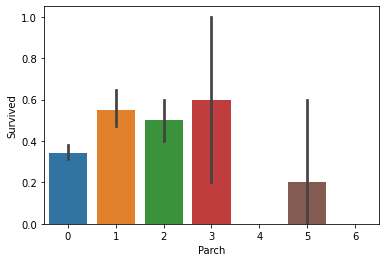

In [11]:
sns.barplot(x="Parch", y="Survived", data=train)
plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

In [12]:
data=[train,test]

In [13]:
for dataset in data:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].mode()[0], inplace = True)
    
train.isnull().sum()    

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Age Feature

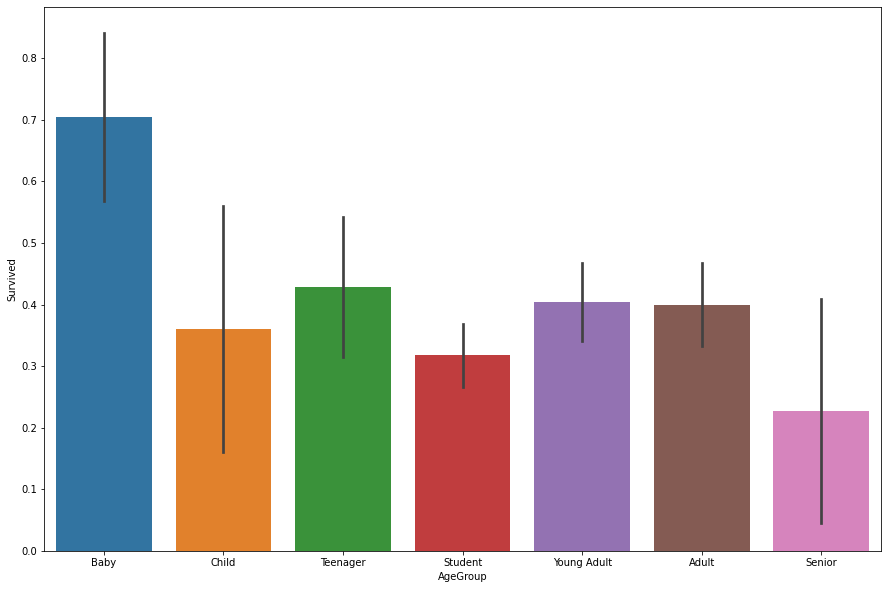

In [14]:
# train["Age"] = train["Age"].fillna(-0.5)
# test["Age"] = test["Age"].fillna(-0.5)
bins = [ 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.rcParams['figure.figsize'] = (22, 15)
plt.show()

Babies are more likely to survive than any other age group. 

In [15]:
train['Age'].isnull().sum()

0

# **CHECKING THE CORRELATION**

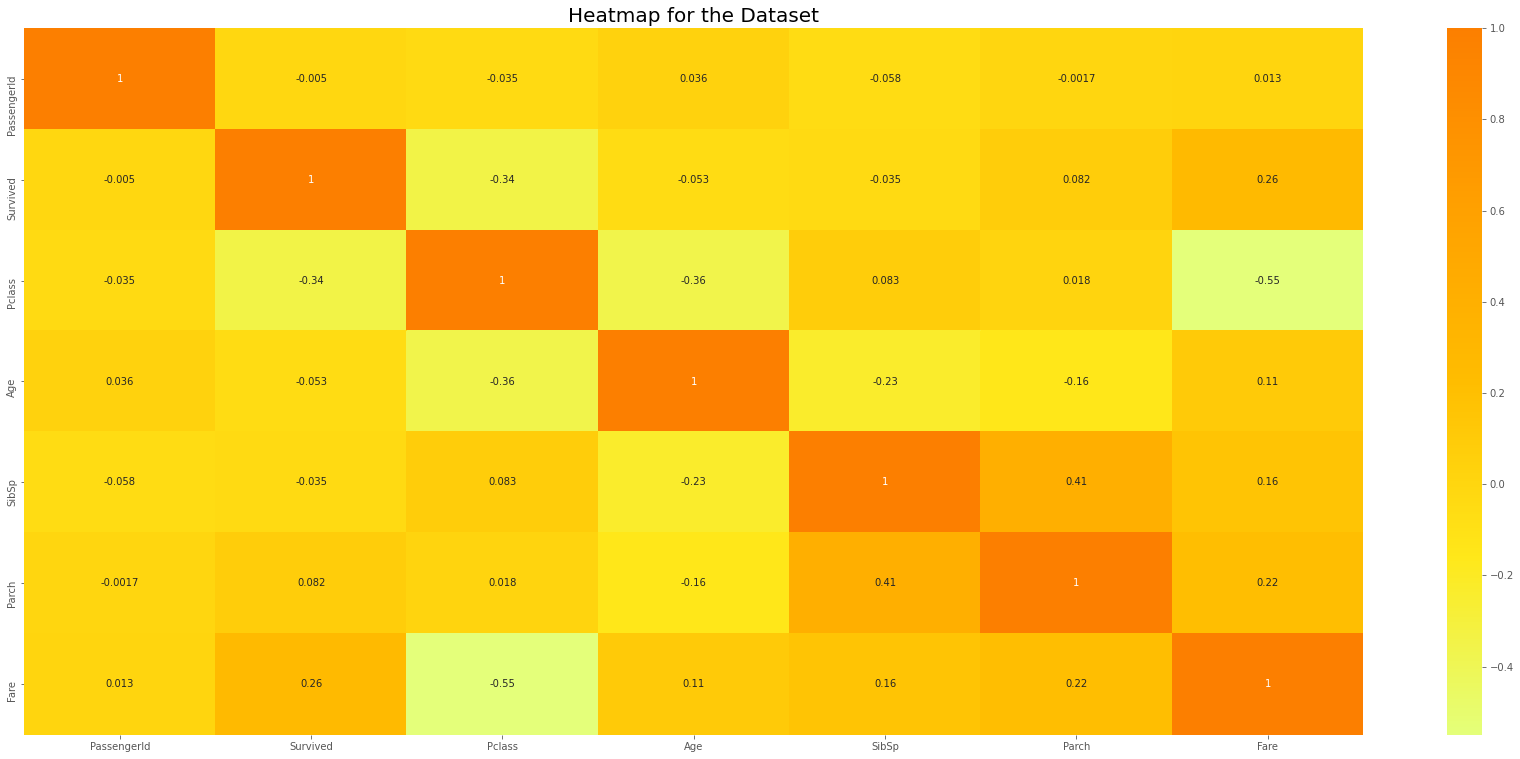

In [16]:
plt.rcParams['figure.figsize'] = (30, 13)
plt.style.use('ggplot')
sns.heatmap(train.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()


In [17]:
corr=train.corr()
corr["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.052872
Pclass        -0.338481
Name: Survived, dtype: float64

## 5) Cleaning Data

Let's see how our test data looks!

In [18]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,7
top,NaN,NaN,"Gale, Mr. Harry",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Student
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,163
mean,1100.500000,2.265550,NaN,NaN,28.364833,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN
std,120.810458,0.841838,NaN,NaN,13.180116,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN


### Cabin Feature

In [19]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

### Ticket Feature

In [20]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

### Embarked Feature

In [21]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


It's clear that the majority of people embarked in Southampton (S). Let's go ahead and fill in the missing values with S.

In [23]:
train = train.fillna({"Embarked": "S"})

### Age Feature

Next we'll fill in the missing values in the Age feature. Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value (as we did with Embarked). Instead, let's try to find a way to predict the missing ages. 

In [24]:
#combined group of both datasets
combine = [train, test]


for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [26]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1


In [27]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
AgeGroup       0
Title          0
dtype: int64

In [28]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode()
mr_age

0    Student
Name: AgeGroup, dtype: category
Categories (7, object): [Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [29]:
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() 
miss_age

0    Student
Name: AgeGroup, dtype: category
Categories (7, object): [Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [30]:
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode()
mrs_age

0    Adult
Name: AgeGroup, dtype: category
Categories (7, object): [Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [31]:
master_age = train[train["Title"] == 4]["AgeGroup"].mode()
master_age

0    Baby
Name: AgeGroup, dtype: category
Categories (7, object): [Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [32]:
royal_age = train[train["Title"] == 5]["AgeGroup"].mode()
royal_age

0    Young Adult
1          Adult
Name: AgeGroup, dtype: category
Categories (7, object): [Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [33]:
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult
rare_age

0    Adult
Name: AgeGroup, dtype: category
Categories (7, object): [Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [34]:
age_title_mapping = {1: "Student", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [35]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

### Name Feature
We can drop the name feature now that we've extracted the titles.

In [36]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### Sex Feature

In [37]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,S,4,1
1,2,1,1,1,1,0,71.2833,C,6,3
2,3,1,3,1,0,0,7.9250,S,5,2
3,4,1,1,1,1,0,53.1000,S,5,3
4,5,0,3,0,0,0,8.0500,S,5,1


### Embarked Feature

In [38]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,1,4,1
1,2,1,1,1,1,0,71.2833,2,6,3
2,3,1,3,1,0,0,7.9250,1,5,2
3,4,1,1,1,1,0,53.1000,1,5,3
4,5,0,3,0,0,0,8.0500,1,5,1


### Fare Feature
It's time separate the fare values into some logical groups as well as filling in the single missing value in the test dataset.

In [39]:
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,1,0,3,0,1,0,1,4,1,1
1,2,1,1,1,1,0,2,6,3,4
2,3,1,3,1,0,0,1,5,2,2
3,4,1,1,1,1,0,1,5,3,4
4,5,0,3,0,0,0,1,5,1,2


In [41]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,892,3,0,0,0,3,5,1,1
1,893,3,1,1,0,1,6,3,1
2,894,2,0,0,0,3,7,1,2
3,895,3,0,0,0,1,5,1,2
4,896,3,1,1,1,1,4,3,2


## 6) CHOOSING THE BEST MODEL

### Splitting the Training Data
We will use part of our training data (22% in this case) to test the accuracy of our different models.

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [43]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size = 0.11, random_state = 0)

# NAIVE BAYES

In [44]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)


In [45]:
results = confusion_matrix(Y_test, Y_pred_nb) 
results

array([[97, 27],
       [15, 58]])

In [46]:
print(classification_report(Y_pred_nb,Y_test))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       112
           1       0.79      0.68      0.73        85

    accuracy                           0.79       197
   macro avg       0.79      0.77      0.78       197
weighted avg       0.79      0.79      0.78       197



# LOGISTIC REGRESSION

In [47]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression()

lr1.fit(X_train,Y_train)

Y_pred_lr1 = lr1.predict(X_test)

score_lr1 = round(accuracy_score(Y_pred_lr1,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr1)+" %")

The accuracy score achieved using Logistic Regression is: 80.2 %


In [48]:
results = confusion_matrix(Y_test, Y_pred_lr1)
results

array([[100,  24],
       [ 15,  58]])

In [49]:
print(classification_report(Y_pred_lr1,Y_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       115
           1       0.79      0.71      0.75        82

    accuracy                           0.80       197
   macro avg       0.80      0.79      0.79       197
weighted avg       0.80      0.80      0.80       197



# DECISION TREE

In [54]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, Y_train)
y_preddt = decisiontree.predict(X_test)

score_dt = round(accuracy_score(y_preddt,Y_test)*100,2)


print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.22 %


In [55]:
results = confusion_matrix(Y_test, y_preddt)
results

array([[109,  15],
       [ 22,  51]])

In [56]:
print(classification_report(y_preddt,Y_test))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       131
           1       0.70      0.77      0.73        66

    accuracy                           0.81       197
   macro avg       0.79      0.80      0.79       197
weighted avg       0.82      0.81      0.81       197



# RANDOM FOREST

In [58]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, Y_train)

y_predrf = randomforest.predict(X_test)

score_rf = round(accuracy_score(y_predrf,Y_test)*100,2)


print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 85.79 %


In [59]:
results = confusion_matrix(Y_test, y_predrf)
results

array([[110,  14],
       [ 14,  59]])

In [60]:
print(classification_report(y_predrf,Y_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       124
           1       0.81      0.81      0.81        73

    accuracy                           0.86       197
   macro avg       0.85      0.85      0.85       197
weighted avg       0.86      0.86      0.86       197



# K NEAREST NEIGHBORS

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_predknn = knn.predict(X_test)

score_knn = round(accuracy_score(y_predknn,Y_test)*100,2)


print("The accuracy score achieved using Random Forest is: "+str(score_knn)+" %")

The accuracy score achieved using Random Forest is: 84.26 %


In [62]:
results = confusion_matrix(Y_test, y_predknn)
results

array([[109,  15],
       [ 16,  57]])

In [63]:
print(classification_report(y_predknn,Y_test))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       125
           1       0.78      0.79      0.79        72

    accuracy                           0.84       197
   macro avg       0.83      0.83      0.83       197
weighted avg       0.84      0.84      0.84       197



# GRADIENT BOOSTING CLASSIFIER

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, Y_train)
y_predgbg = gbk.predict(X_test)


score_gbg = round(accuracy_score(y_predgbg,Y_test)*100,2)


print("The accuracy score achieved using Random Forest is: "+str(score_gbg)+" %")

The accuracy score achieved using Random Forest is: 83.76 %


In [65]:
results = confusion_matrix(Y_test, y_predgbg)
results

array([[110,  14],
       [ 18,  55]])

In [66]:
print(classification_report(y_predgbg,Y_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       128
           1       0.75      0.80      0.77        69

    accuracy                           0.84       197
   macro avg       0.82      0.83      0.82       197
weighted avg       0.84      0.84      0.84       197

